## Kiva Crowd Funding Analysis

website: kiva.org

# Deskripsi kolom: 
Berikut adalah deskripsi dari masing-masing kolom:
- `id`: Unique ID untuk masing-masing loan (loan ID)
- `funded_amount`: Jumlah yang dicairkan oleh Kiva ke agen (USD)
- `loan_amount`: Jumlah yang disalurkan oleh agen ke peminjam (USD)
	Keterangan tambahan:
    + loan_amount adalah jumlah dana yang dibutuhkan oleh borrower (peminjam).
    + funded_amount biasanya sama atau lebih kecil dari loan_amount:
        - Sama: Jika seluruh jumlah yang dibutuhkan berhasil terkumpul.
        - Lebih kecil: Jika belum seluruhnya terkumpul, tetapi Kiva memutuskan tetap mendistribusikan sebagian yang sudah terkumpul.
- `activity`: Kategori lebih spesifik dari `sector`
- `sector`: Kategori dari loan
- `country`: Nama negara lengkap, tempat pinjaman dicairkan
- `region`: Nama wilayah lengkap dari `country`
- `currency`: Mata uang
- `partner_id`: ID untuk organisasi partner
- `posted_time`: Waktu pinjaman di-posting di Kiva oleh agen
- `funded_time`: Waktu pinjaman telah sepenuhnya dibiayai oleh pemberi pinjaman
- `term_in_months`: Durasi pencairan pinjaman (dalam satuan bulan)
- `lender_count`: Banyaknya peminjam yang berkontribusi
- `repayment_interval`: Cara pelunasan peminjaman


# Latar Belakang

Kiva adalah platform pinjaman mikro yang memungkinkan individu dan organisasi memberikan pinjaman kepada peminjam di berbagai negara berkembang. Pinjaman ini digunakan untuk berbagai keperluan, seperti pertanian, perdagangan, pendidikan, dan kebutuhan rumah tangga.

Dalam analisis ini, kita akan mengeksplorasi aktivitas mana yang paling layak diberikan pinjaman berdasarkan beberapa faktor, seperti:
 - Jumlah peminjam per aktivitas
 - Pola pembayaran berdasarkan interval pengembalian
 - Durasi pinjaman (term in months)
 - Sebaran pinjaman di berbagai negara
 - Risiko gagal bayar berdasarkan karakteristik pinjaman
 

# Tujuan Analisis

Analisis ini bertujuan untuk memberikan insight bisnis bagi pemberi pinjaman agar dapat mengalokasikan dana ke aktivitas yang memiliki peluang tinggi untuk sukses dan meminimalkan risiko gagal bayar.


# Metodologi

Untuk mencapai tujuan tersebut, beberapa langkah analisis yang dilakukan meliputi:
 - Melakukan data cleaning dari:
    + missing value (`null`)
    + data type yang sesuai
 - Memfilter dataset untuk mendapatkan data relevan berdasarkan aktivitas dan negara.
 - Membuat pivot table untuk memahami distribusi pinjaman berdasarkan kategori tertentu.

# Hasil yang Diharapkan

- Memberikan informasi sektor dan aktivitas bisnis mana saja yang dana memiliki dana peminjaman yang paling banyak terpenuhi 
- Melihat berapa banyak borrower yang membayar secara teratur
- Menganilisis aktivitas bisnis mana memiliki id partner penyalur dana yang terdaftar secara resmi
- Mengetahui di negara mana yang data wilayah borrower terdaftar secara resmi
- Menentukan pengembalian dengan rata-rata paling cepat

🚀 Analisis ini diharapkan dapat meningkatkan efektivitas dalam memberikan pinjaman dan mengoptimalkan dampak sosial dari pinjaman mikro yang diberikan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)

In [4]:
df = pd.read_csv('kiva_loan.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(4), int64(2), object(9)

# Data Wrangling

In [5]:
df['funded_time'] = pd.to_datetime(df['funded_time'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  object             
 4   sector              671205 non-null  object             
 5   use                 666973 non-null  object             
 6   country             671205 non-null  object             
 7   region              614405 non-null  object             
 8   currency            671205 non-null  object             
 9   partner_id          657698 non-null  float64            
 10  posted_time         671205 non-null  object             
 11  funded_time         622874 non-null  datetime64[ns, UTC]
 12  term_in_months  

In [5]:
df[df['funded_time'].isna()]

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
87,653261,4275.0,5000.0,Personal Housing Expenses,Housing,"to pave the ground and repair the ceiling, to ...",Palestine,jenin,USD,122.0,2014-01-02 09:53:45+00:00,NaT,39.0,58,monthly
112,653256,1925.0,2400.0,Electronics Repair,Services,to pay the annual rent for his shop,Iraq,NaN,USD,166.0,2014-01-02 09:44:10+00:00,NaT,15.0,41,monthly
186,653253,2625.0,3000.0,Grocery Store,Food,to pay the annual rent on his grocery store an...,Iraq,NaN,USD,166.0,2014-01-02 09:35:12+00:00,NaT,15.0,72,monthly
309,653259,2750.0,3000.0,Grocery Store,Food,to install a new floor in his grocery store an...,Iraq,NaN,USD,166.0,2014-01-02 09:51:47+00:00,NaT,15.0,44,monthly
313,653263,1300.0,3000.0,Clothing,Clothing,to buy shoes and clothes to sell.,Palestine,jenin,USD,122.0,2014-01-02 10:03:18+00:00,NaT,27.0,35,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671199,1340318,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25 06:45:02+00:00,NaT,13.0,0,monthly
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,NaT,13.0,0,monthly
671202,1340334,0.0,25.0,Games,Entertainment,NaN,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,NaT,13.0,0,monthly
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,NaT,13.0,0,monthly


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  object             
 4   sector              671205 non-null  object             
 5   use                 666973 non-null  object             
 6   country             671205 non-null  object             
 7   region              614405 non-null  object             
 8   currency            671205 non-null  object             
 9   partner_id          657698 non-null  float64            
 10  posted_time         671205 non-null  object             
 11  funded_time         622874 non-null  datetime64[ns, UTC]
 12  term_in_months  

In [8]:
df['region'] = df['region'].fillna(value = '-')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  object             
 4   sector              671205 non-null  object             
 5   use                 666973 non-null  object             
 6   country             671205 non-null  object             
 7   region              671205 non-null  object             
 8   currency            671205 non-null  object             
 9   partner_id          657698 non-null  float64            
 10  posted_time         671205 non-null  object             
 11  funded_time         622874 non-null  datetime64[ns, UTC]
 12  term_in_months  

In [10]:
df['use'] = df['use'].fillna(value = '-')

In [11]:
df['partner_id'] = df['partner_id'].fillna(value = '-')

In [12]:
df['country'] = df['country'].astype('category')

In [13]:
df['activity'] = df['activity'].astype('category')

In [14]:
df['sector'] = df['sector'].astype('category')

In [15]:
df['currency'] = df['currency'].astype('category')

In [16]:
df['repayment_interval'] = df['repayment_interval'].astype('category')

In [17]:
df['posted_time'] = pd.to_datetime(df['posted_time'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  category           
 4   sector              671205 non-null  category           
 5   use                 671205 non-null  object             
 6   country             671205 non-null  category           
 7   region              671205 non-null  object             
 8   currency            671205 non-null  category           
 9   partner_id          671205 non-null  object             
 10  posted_time         671205 non-null  datetime64[ns, UTC]
 11  funded_time         622874 non-null  datetime64[ns, UTC]
 12  term_in_months  

# Business Question

Business Activity apa yang paling bisa dipercaya untuk lender meminjamkan uang berdasarkan indikator berikut:
- `loan_amount` dari sektor mana saja yang paling banyak terpenuhi `funded_amount`
- `repayment_interval`: banyaknya borrower yang membayar secara teratur
- `partner_id`: memiliki id partner penyalur dana yang terdaftar secara resmi
- `region`: di negara mana yang data wilayah borrower terdaftar secara resmi
- `term_in_month`: pengembalian dengan rata-rata paling cepat

In [20]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.0,16,monthly


# Analisis `repayment_interval`

- `bullet`: pembayaran lumpsum, sehingga diambil yang **di atas `Q3`**
- `porsi irregular`: pembayaran yang tidak teratur bahkan cenderung akan menjadi kurang bayar, sehingga diambil yang **di bawah `Q1`**

In [21]:
peminjam = df.pivot_table(index = 'activity',
               columns = 'repayment_interval',
               values = 'id',
               aggfunc = 'count').sort_values('bullet', ascending = False)
peminjam


repayment_interval,bullet,irregular,monthly,weekly
activity,,,,
Farming,23176,13515,36264,0
Agriculture,10242,4796,11946,39
Personal Expenses,2978,1465,2213,0
Services,2177,2892,4591,147
Livestock,2096,2707,8292,0
...,...,...,...,...
Celebrations,0,3,2,0
Bookbinding,0,9,20,0
Sporting Good Sales,0,3,75,0


In [26]:
peminjam['porsi irregular'] = peminjam['irregular']/(peminjam['bullet'] + peminjam['irregular']+ peminjam['monthly']+peminjam['weekly'])

<Axes: xlabel='bullet'>

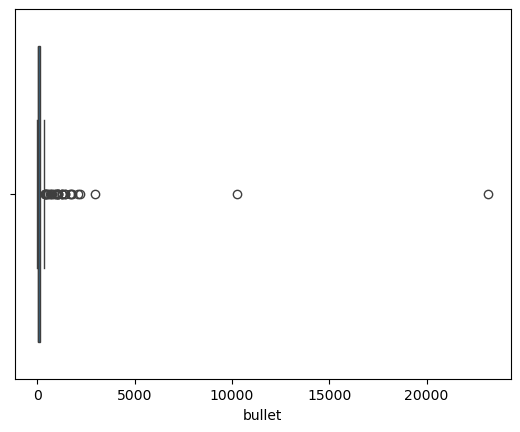

In [22]:
sns.boxplot(data = peminjam, x = 'bullet')

In [213]:
peminjam.describe()

repayment_interval,bullet,irregular,monthly,weekly,porsi irregular
count,163.000000,163.000000,163.000000,163.000000,163.000000
mean,433.914110,1577.656442,2102.558282,3.693252,0.321465
std,2015.003487,4573.635851,4568.259314,18.915123,0.187459
min,0.000000,0.000000,2.000000,0.000000,0.000000
25%,9.500000,42.000000,110.500000,0.000000,0.184080
50%,33.000000,191.000000,359.000000,0.000000,0.293638
75%,142.000000,1212.000000,1864.500000,0.000000,0.432540
max,23176.000000,46973.000000,36264.000000,147.000000,0.861613


In [23]:
iqr = 142-9.5

upper = 142+1.5*iqr
upper

340.75

In [27]:
filter_peminjam = peminjam[(peminjam['bullet'] > 340.75) & (peminjam['porsi irregular'] < 0.184080)].reset_index()
filter_peminjam['activity'] = filter_peminjam['activity'].cat.remove_unused_categories()

In [244]:
filter_peminjam

repayment_interval,activity,bullet,irregular,monthly,weekly,porsi irregular
0,Agriculture,10242,4796,11946,39,0.177478
1,Farm Supplies,1749,726,1877,0,0.166820
2,Home Appliances,1684,678,17905,0,0.033453
3,Primary/secondary school costs,1273,836,4707,0,0.122653
4,Cattle,1246,996,5623,0,0.126637
5,Higher education costs,1080,2152,16510,0,0.109006
6,Dairy,1077,611,6226,0,0.077205
7,Animal Sales,1004,1392,6841,0,0.150698
8,Phone Use Sales,740,178,101,0,0.174681
9,Mobile Transactions,189,13,14,0,0.060185


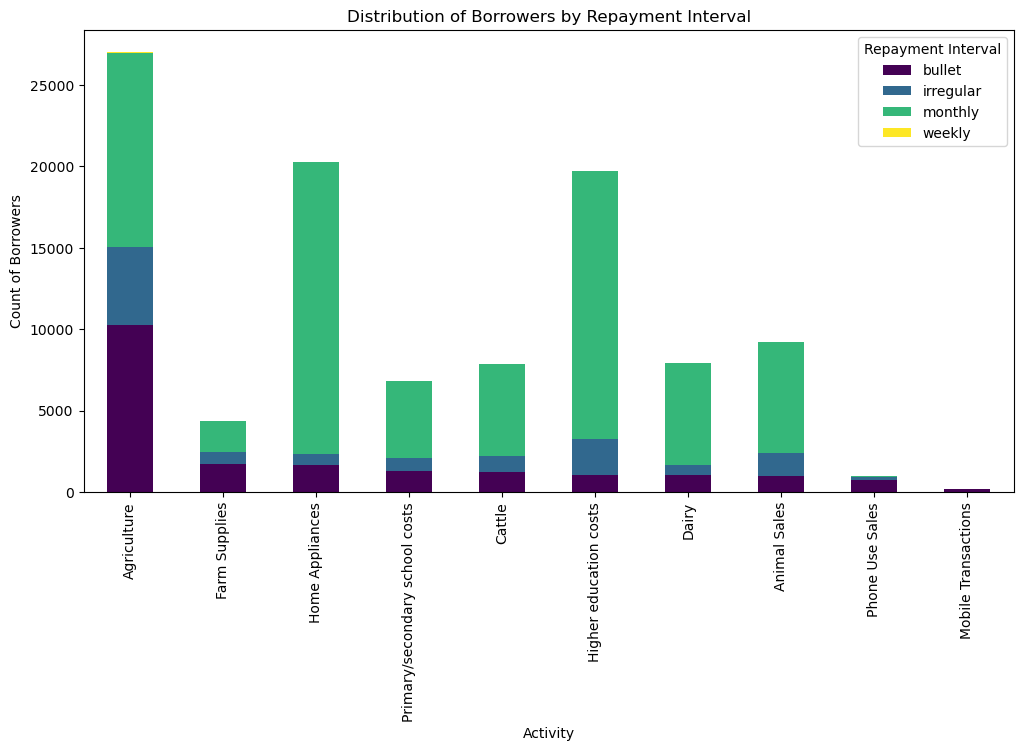

In [246]:
def plot_peminjam_barplot(filter_peminjam):
    # Plot bar chart excluding 'porsi irregular'
    ax = filter_peminjam.set_index('activity')[['bullet', 'irregular', 'monthly', 'weekly']].plot(
        kind='bar', figsize=(12, 6), stacked=True, colormap='viridis'
    )
    
    # Labels and title
    plt.xlabel("Activity")
    plt.ylabel("Count of Borrowers")
    plt.title("Distribution of Borrowers by Repayment Interval")
    plt.xticks(rotation=90)
    plt.legend(title="Repayment Interval")
    
    # Show plot
    plt.show()

plot_peminjam_barplot(filter_peminjam)

> Rekomendasi `Activity` yang dapat diberikan pinjaman based on analisis `repayment_interval`

- Agriculture
- Farm Supplies
- Home Appliances
- Primary/secondary school costs
- Cattle
- Higher education
- Dairy
- Animal sales
- Phone use sales
- mobile transactions

Hal ini dikarenakan banyaknya repayment_interval yang regular dan proporsi irregular yang di bawah Q1 (18%)

# Analisis `loan_amount` yang dipenuhi dari `funded_amount`

banyaknya proporsi `activity` yang dimana `loan_amount` yang sama dengan `funded_amount` mempengaruhi persepsi terkait kinerja bisnis tersebut
yang diambil adalah `activity` dengan jumlah `loan_amount`=`funded_amount` di atas Q3

In [252]:
funded = df[df['loan_amount'] == df['funded_amount']]
funded

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.0,16,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671166,1340251,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,-,KES,138.0,2017-07-21 06:36:35+00:00,2017-07-22 12:51:42+00:00,13.0,1,monthly
671170,1340267,25.0,25.0,Livestock,Agriculture,Reviewed loan use in english.,Pakistan,Attock,PKR,245.0,2017-07-21 21:46:10+00:00,2017-07-22 13:07:29+00:00,13.0,1,monthly
671177,1340279,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,-,KES,138.0,2017-07-22 06:04:07+00:00,2017-07-24 12:44:16+00:00,13.0,1,monthly
671186,1340300,25.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-24 08:09:10+00:00,2017-07-25 00:19:01+00:00,13.0,1,monthly


In [254]:
fully_funded = funded.groupby('activity')[['id']].count().reset_index().sort_values('id', ascending = False)
fully_funded.describe()

,id
count,163.000000
mean,3821.319018
std,8702.956604
min,2.000000
25%,171.500000
50%,579.000000
75%,3562.500000
max,66835.000000


In [281]:
iqr = 3562.5-171.5

upper = 3562.5+1.5*iqr
upper

8649.0

In [282]:
fully_funded[fully_funded['id'] > upper]

,activity,id
57,Farming,66835
72,General Store,60302
112,Personal Housing Expenses,28580
65,Food Production/Sales,26397
120,Pigs,25962
1,Agriculture,24513
133,Retail,22315
78,Home Appliances,20030
34,Clothing Sales,20008
77,Higher education costs,19217


> Dari Analisis `repayment_interval` dan `funded`, ada beberapa `activity` yang beririsan:

- Agriculture
- Home Appliances
- Higher education costs


# Analisis `partner_id`

Dicari `activity` mana yang paling banyak `partner_id` yang teregistrasi

In [273]:
partner_legal = df[df['partner_id'] != '-']
partner_legal

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.0,16,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,NaT,13.0,0,monthly
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,-,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-26 02:09:43+00:00,13.0,1,monthly
671202,1340334,0.0,25.0,Games,Entertainment,-,Kenya,-,KES,138.0,2017-07-26 00:02:07+00:00,NaT,13.0,0,monthly
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",Kenya,-,KES,138.0,2017-07-26 06:12:55+00:00,NaT,13.0,0,monthly


In [278]:
legal = partner_legal.groupby('activity')[['partner_id']].count().reset_index().sort_values('partner_id', ascending = False)
legal

,activity,partner_id
57,Farming,72955
72,General Store,63268
112,Personal Housing Expenses,32448
65,Food Production/Sales,27405
120,Pigs,26624
...,...,...
144,Technology,6
55,Event Planning,5
25,Celebrations,5
53,Energy,4


In [280]:
legal.describe()

,partner_id
count,163.000000
mean,4034.957055
std,9291.681280
min,2.000000
25%,186.000000
50%,653.000000
75%,3765.500000
max,72955.000000


In [284]:
iqr = 3765.5-186

upper = 3765.5+1.5*iqr

In [285]:
legal[legal['partner_id'] > upper]

,activity,partner_id
57,Farming,72955
72,General Store,63268
112,Personal Housing Expenses,32448
65,Food Production/Sales,27405
120,Pigs,26624
1,Agriculture,24879
133,Retail,24514
34,Clothing Sales,22339
78,Home Appliances,20267
77,Higher education costs,19742


> Rekomendasi `Activity` yang dapat diberikan pinjaman based on analisis `partner_id`

- Agriculture
- Home Appliances
- Higher education

dengan `partner_id` yang teregistrasi secara legal maka tingkat kepercayaan dana akan dikembalikan makin tinggi dengan adanya partner lender sebagai penjamin

## Analisis `region` yang terdaftar resmi di masing-masing `country`

- ambil `activity` yang memiliki jumlah value `region` teregistrasi secara legal

In [20]:
region_legal = df[df['region'] != '-']

In [21]:
region_legal

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.0,16,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671195,1340329,0.0,50.0,Livestock,Agriculture,Edited loan use in english.,Ghana,Dansoman,GHS,231.0,2017-07-25 22:40:59+00:00,NaT,13.0,0,monthly
671196,1340325,0.0,250.0,Livestock,Agriculture,Reviewed loan use in english.,Ghana,Dansoman,GHS,231.0,2017-07-25 21:36:20+00:00,NaT,13.0,0,monthly
671198,1340331,0.0,75.0,Livestock,Agriculture,Pretend the issue with spanish loan was addres...,Mexico,Iztacalco,MXN,294.0,2017-07-25 23:13:50+00:00,NaT,13.0,0,monthly
671199,1340318,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25 06:45:02+00:00,NaT,13.0,0,monthly


In [28]:
region = region_legal.groupby('activity')[['region']].count().reset_index().sort_values(by = 'region', ascending = False)
region

,activity,region
57,Farming,70118
72,General Store,60860
112,Personal Housing Expenses,26931
120,Pigs,26229
65,Food Production/Sales,23596
...,...,...
144,Technology,6
25,Celebrations,5
55,Event Planning,5
53,Energy,3


In [29]:
region.describe()

,region
count,163.000000
mean,3769.355828
std,8762.272449
min,2.000000
25%,181.000000
50%,608.000000
75%,3436.000000
max,70118.000000


In [30]:
iqr = 3436-181

upper = 3436+1.5*iqr

In [31]:
region[region['region'] > upper]

,activity,region
57,Farming,70118
72,General Store,60860
112,Personal Housing Expenses,26931
120,Pigs,26229
65,Food Production/Sales,23596
1,Agriculture,21897
133,Retail,21376
34,Clothing Sales,20474
78,Home Appliances,20242
77,Higher education costs,19309


> Rekomendasi `Activity` yang dapat diberikan pinjaman based on analisis `region` dan memiliki overlap dengan analisis sebelumnya

- Agriculture
- Home Appliances
- Higher education
- Grocery Store

In [98]:
country_region_legal = df[
    (df['activity'].isin(['Agriculture', 'Home Appliances', 'Higher education costs', 'Grocery Store'])) &
    (df['region'] != '-')
]
country_region_legal

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
80,653430,1000.0,1000.0,Grocery Store,Food,"to stock food products like basic grains, suga...",Honduras,"Nueva Frontera, Santa Barbara.",HNL,201.0,2014-01-02 23:27:36+00:00,2014-01-23 01:20:36+00:00,20.0,34,monthly
85,653175,3175.0,3175.0,Agriculture,Agriculture,"To purchase standard quality seeds, fertilizer...",India,"Balipatna, Odisha",INR,241.0,2014-01-02 06:43:17+00:00,2014-01-14 21:57:40+00:00,43.0,97,bullet
90,653383,1000.0,1000.0,Grocery Store,Food,"to buy more products like meats, dairy product...",Honduras,"San Pedro Sula, Cortés",HNL,201.0,2014-01-02 16:10:01+00:00,2014-01-29 17:22:11+00:00,14.0,40,monthly
100,653373,1000.0,1000.0,Grocery Store,Food,to invest in working capital and to provide hi...,Nicaragua,Leon,NIO,96.0,2014-01-02 15:26:18+00:00,2014-01-31 14:29:51+00:00,14.0,20,monthly
137,653434,750.0,750.0,Grocery Store,Food,"to buy more products such as basic grains, mea...",Honduras,"Azacualpa, Santa Bárbara",HNL,201.0,2014-01-02 23:47:43+00:00,2014-01-19 19:36:27+00:00,15.0,25,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671117,1338823,175.0,1875.0,Higher education costs,Education,to pay the tuition.,Paraguay,Villarrica,PYG,58.0,2017-07-13 03:48:14+00:00,NaT,14.0,5,monthly
671125,1338821,325.0,1875.0,Higher education costs,Education,to pay the tuition.,Paraguay,San Lorenzo,PYG,58.0,2017-07-13 03:44:23+00:00,NaT,14.0,8,monthly
671133,1338878,475.0,475.0,Higher education costs,Education,to pay her son's tuition.,Tajikistan,Dushanbe,TJS,63.0,2017-07-13 06:38:39+00:00,2017-07-16 04:29:11+00:00,14.0,12,monthly
671134,1338682,3525.0,3525.0,Grocery Store,Food,"to buy drinks, baked goods, greens, meat, vege...",Paraguay,Ciudad del Este,PYG,58.0,2017-07-13 00:31:11+00:00,2017-07-15 17:44:19+00:00,5.0,16,irregular


In [99]:
# Buat pivot table berdasarkan country
pivot_table = country_region_legal.pivot_table(index='country',
                                      columns='activity',
                                      values='id',
                                      aggfunc='count')

pivot_table = pivot_table[['Agriculture', 'Home Appliances', 'Higher education costs', 'Grocery Store']]

# pivot_table.sort_values(by = 'Agriculture', ascending= False).head()
# pivot_table.sort_values(by = 'Home Appliances', ascending= False).head()
pivot_table.sort_values(by = 'Higher education costs', ascending= False).head()

activity,Agriculture,Home Appliances,Higher education costs,Grocery Store
country,,,,
Paraguay,83,1,3797,258
Tajikistan,1197,140,2357,260
Jordan,6,0,2006,179
Philippines,1296,364,1561,1313
Palestine,82,349,1445,290


> Rekomendasi `Activity` yang dapat diberikan pinjaman based on analisis `region` dan terdapat pada masing2 `country`:

- Di Bidang **Agriculture** ada Top 5 negara terbaik untuk meminjamkan dana:
    1. Kenya
    2. El Salvador
    3. Peru
    4. Honduras
    5. Philipines
- Di Bidang **Home Appliances** ada Top 5 negara terbaik untuk meminjamkan dana:
    1. Cambodia
    2. Laos
    3. Peru
    4. Philipines
    5. Palestine
- Di Bidang **Higher education** ada Top 5 negara terbaik untuk meminjamkan dana:
    1. Paraguay
    2. Tajikistan
    3. Jordan
    4. Philipines
    5. Palestine


In [100]:
# Buat pivot table berdasarkan country
pivot_table = country_region_legal.pivot_table(index='country',
                                      columns='activity',
                                      values='funded_amount',
                                      aggfunc='sum')

pivot_table = pivot_table[['Agriculture', 'Home Appliances', 'Higher education costs', 'Grocery Store']]

# pivot_table.sort_values(by = 'Agriculture', ascending= False).head()
# pivot_table.sort_values(by = 'Home Appliances', ascending= False).head()
pivot_table.sort_values(by = 'Higher education costs', ascending= False).head()

activity,Agriculture,Home Appliances,Higher education costs,Grocery Store
country,,,,
Paraguay,251550.0,1425.0,2583900.0,795350.0
Jordan,7300.0,0.0,1953725.0,198400.0
Palestine,126825.0,441275.0,1918925.0,442650.0
Tajikistan,763800.0,78250.0,1771600.0,228925.0
Cambodia,376600.0,2730475.0,1665750.0,366575.0


> Rekomendasi `Activity` yang dapat diberikan pinjaman based on analisis `region` dan terdapat pada masing2 `country` yang memiliki `funded_amount` terbanyak :

- Di Bidang **Agriculture** ada Top 4 negara terbaik untuk meminjamkan dana yang overlap dengan analisis sebelumnya:
    1. Kenya
    2. El Salvador
    3. Peru
    4. Honduras
- Di Bidang **Home Appliances** ada Top 4 negara terbaik untuk meminjamkan dana yang overlap dengan analisis sebelumnya:
    1. Cambodia
    2. Laos
    3. Peru
    4. Palestine
- Di Bidang **Higher education** ada Top 4 negara terbaik untuk meminjamkan dana yang overlap dengan analisis sebelumnya:
    1. Paraguay
    2. Tajikistan
    3. Jordan
    4. Palestine


## Analisis `term_in_month`

- mencari `activity` dengan `term_in_month` paling relevan
    + `activity` mana yang paling banyak `term_in_month` = 1 bulan
    + `activity` mana yang memiliki `term_in_month` lebih kecil dari `median` (13 bulan)

In [75]:
df.describe()

,id,funded_amount,loan_amount,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,158.000000,2986.000000


In [89]:
activity_1_month = df[df['term_in_months'] == 1].groupby('activity')[['id']].count().sort_values(by = 'id',ascending=False).head(8)
activity_1_month


,id
activity,
Grocery Store,9
Clothing,8
General Store,5
Services,4
Transportation,2
Construction,1
Cosmetics Sales,1
Agriculture,1


In [91]:
activity_below_median = df[df['term_in_months'] < 13].groupby('activity')[['id']].count().sort_values(by = 'id',ascending=False).head(20)
activity_below_median

,id
activity,
General Store,46177
Farming,28270
Pigs,18657
Home Appliances,17481
Food Production/Sales,16147
Retail,14584
Agriculture,11562
Clothing Sales,10684
Fish Selling,9731


> Rekomendasi `Activity` yang dapat diberikan pinjaman based on analisis `term_in_months`:
   
+ `activity` mana yang paling banyak `term_in_month` = 1 bulan, yang juga memenuhi kriteria analisis sebelumnya:
    - General Store
    - Agriculture
    - Grocery Store

+ `activity` mana yang memiliki `term_in_month` lebih kecil dari `median` (13 bulan), yang juga memenuhi kriteria analisis sebelumnya:
    - General Store
    - Agriculture
    - Home Appliances
    - Grocery Store

## Kesimpulan dan Rekomendasi

Rekomendasi activity akan melihat business activity mana yang setelah dilakukana 5 analisis kelayakan dapat memenuhi syarat kelayakan minimal 4 analisis kelayakan

1. `activity` yang memenuhi keseluruhan 5 analisis kelayakan yang paling bisa dipercaya untuk lender meminjamkan uang:
    - Agriculture
    - Home Appliances

2. `activity` yang memenuhi 4 analisis kelayakan yang paling bisa dipercaya untuk lender meminjamkan uang:
    - Grocery Store (tidak memenuhi analisis`repayment_interval`)
    - Higher education costs (tidak memenuhi analisis `term_in_months`)

> Rekomendasi:

Terdapat 5 Business Activity yang bisa dipercaya untuk lender meminjamkan uang:
1. Agriculture
2. Home Appliances
3. Grocery Store
4. Higher education costs

In [19]:
df.to_csv('kiva_clean.csv', index = False)